In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import math
from sklearn.metrics import mean_squared_error 

In [2]:
X_train = pd.read_csv('Train_Scaled_Cont_Int.csv')
X_train = X_train.drop('LoanApproved' , axis=1)
y_train = X_train['RiskScore']
X_train = X_train.drop('RiskScore' , axis=1)
X_train.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,1.487718,-0.305854,-1.172820,0,0,1.549408,-0.674158,-1.226708,1,0.342057,...,-0.473530,-0.619087,-0.830534,-0.707898,-1.340131,-0.327901,-0.120724,0.498070,-0.088823,0.505214
1,-0.740634,-0.364793,0.315682,0,3,-1.006777,1.288418,1.217582,1,1.776507,...,0.109050,-0.441843,-0.358890,-0.655377,0.441316,0.194702,0.968318,2.112439,0.565780,0.083891
2,0.030718,0.698946,0.746564,0,3,0.050955,-0.530405,-0.737850,0,1.776507,...,0.027450,0.570655,0.720578,-0.634868,-1.340131,-0.311338,-1.167424,-0.582772,-0.354121,-0.702282
3,1.659129,3.766004,1.862940,0,2,1.637552,-0.381553,0.239866,1,-1.092394,...,-0.146939,-0.590593,3.832985,0.895194,-0.894769,-0.005362,-1.350636,-1.302610,-0.601173,-1.033090
4,-0.654928,-0.121030,0.061069,0,4,-0.477911,0.913035,-0.248992,0,-0.375169,...,-0.636201,-0.046441,-0.111522,-0.792593,-0.449407,-0.535198,0.161041,0.107046,0.462228,-0.034117


In [3]:
X_validation = pd.read_csv('Valid_Scaled_Cont_Int.csv')
X_validation = X_validation.drop('LoanApproved' , axis=1)
y_validation = X_validation['RiskScore']
X_validation = X_validation.drop('RiskScore' , axis=1)
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4000 non-null   float64
 1   AnnualIncome                4000 non-null   float64
 2   CreditScore                 4000 non-null   float64
 3   EmploymentStatus            4000 non-null   int64  
 4   EducationLevel              4000 non-null   int64  
 5   Experience                  4000 non-null   float64
 6   LoanAmount                  4000 non-null   float64
 7   LoanDuration                4000 non-null   float64
 8   MaritalStatus               4000 non-null   int64  
 9   NumberOfDependents          4000 non-null   float64
 10  HomeOwnershipStatus         4000 non-null   int64  
 11  MonthlyDebtPayments         4000 non-null   float64
 12  CreditCardUtilizationRate   4000 non-null   float64
 13  NumberOfOpenCreditLines     4000 

In [4]:
X_test = pd.read_csv('Test_Scaled_Cont_Int.csv')
X_test = X_test.drop('LoanApproved' , axis=1)
y_test = X_test['RiskScore']
X_test = X_test.drop('RiskScore' , axis=1)

In [5]:
y_validation.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: RiskScore
Non-Null Count  Dtype  
--------------  -----  
4000 non-null   float64
dtypes: float64(1)
memory usage: 31.4 KB


In [31]:
class SingleLayer(nn.Module):
    def __init__(self,hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1)
        )
    def forward(self, x):
        return self.layers(x)

In [6]:
X_training = X_train.values
y_training = y_train.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_test.values
y_testing = y_test.values

In [7]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [8]:
print(X_training.shape)

(12000, 33)


Training Losses for hidden layer 8
          0
0  1.055259
1  1.046927
2  1.038744
3  1.030713
4  1.022837
 RMSE for validation set is : 0.4034302310008042
 RMSE for test set is : 0.39594448143660754
Training Losses for hidden layer 16
          0
0  0.980489
1  0.973555
2  0.966931
3  0.960623
4  0.954632
 RMSE for validation set is : 0.3826739001925135
 RMSE for test set is : 0.37662104076402336
Training Losses for hidden layer 32
          0
0  1.123522
1  1.104032
2  1.085571
3  1.068149
4  1.051770
 RMSE for validation set is : 0.3597159426966261
 RMSE for test set is : 0.35673068393790885
Training Losses for hidden layer 64
          0
0  0.978495
1  0.966959
2  0.955733
3  0.944643
4  0.933620
 RMSE for validation set is : 0.3337240598898961
 RMSE for test set is : 0.33396231148996425
Training Losses for hidden layer 128
          0
0  1.022720
1  1.002664
2  0.986392
3  0.970109
4  0.953264
 RMSE for validation set is : 0.3334386393483797
 RMSE for test set is : 0.3355789822015

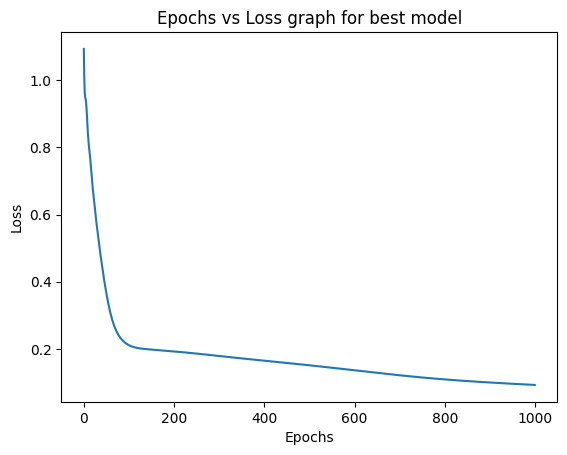

In [35]:
nuerons = [8,16,32,64,128,256]
min_err = 10000
again_loss = []
epochs = 1000
opt_degree = 0
for nueron in nuerons:
    model = SingleLayer(hidden1=nueron)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_arr = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        model.train()
        output = model(X_train)
        loss=criterion(y_train.float(), output)
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
    print(f"Training Losses for hidden layer {nueron}")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val).detach().numpy()
    rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
    min_err = min(min_err,rmse)
    if rmse == min_err:
        again_loss = loss_arr
        opt_degree = nueron
    y_test_pred = model(X_test).detach().numpy()
    rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
    print(f" RMSE for validation set is : {rmse}")
    print(f" RMSE for test set is : {rmse_2}")
print(f"The Least Validation is {min_err} for Hidden Layer of Size {opt_degree}")
plt.plot(range(epochs), again_loss)
plt.title('Epochs vs Loss graph for best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()  
    
 

In [9]:
class DoubleLayer(nn.Module):
    def __init__(self, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  1.065840
1  1.062363
2  1.058978
3  1.055686
4  1.052489
 RMSE for validation set is : 0.37719280153861234
 RMSE for test set is : 0.36955810836383834
Training Losses for hidden layer 16
          0
0  1.008136
1  1.006259
2  1.004594
3  1.003140
4  1.001894
 RMSE for validation set is : 0.34883750655148654
 RMSE for test set is : 0.34452872502446225
Training Losses for hidden layer 32
          0
0  0.995049
1  0.992760
2  0.991183
3  0.990218
4  0.989613
 RMSE for validation set is : 0.3466946343436944
 RMSE for test set is : 0.34506014928447154
Training Losses for hidden layer 64
          0
0  1.153794
1  1.125345
2  1.099915
3  1.077531
4  1.058194
 RMSE for validation set is : 0.35512922651574724
 RMSE for test set is : 0.3508524718334937
Training Losses for hidden layer 128
          0
0  1.021344
1  1.005930
2  1.001069
3  1.003381
4  1.006451
 RMSE for validation set is : 0.3479264206099599
 RMSE for test set is : 0.34621991038

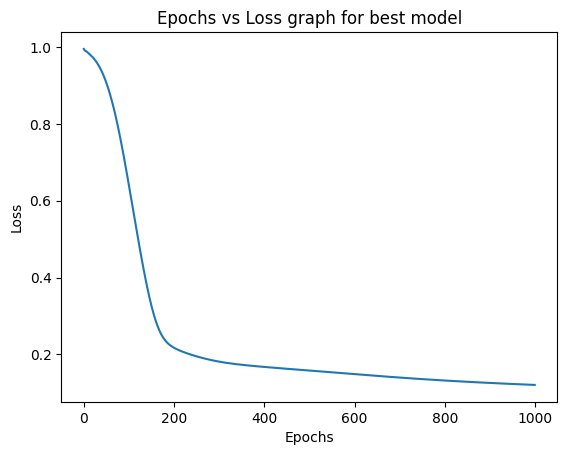

Training Losses for hidden layer 8
          0
0  1.026234
1  1.022750
2  1.019432
3  1.016283
4  1.013301
 RMSE for validation set is : 0.3698684138143204
 RMSE for test set is : 0.36447703537595394
Training Losses for hidden layer 16
          0
0  1.099142
1  1.089653
2  1.080602
3  1.071996
4  1.063838
 RMSE for validation set is : 0.36242455815553226
 RMSE for test set is : 0.3577263374367061
Training Losses for hidden layer 32
          0
0  1.631407
1  1.592697
2  1.555322
3  1.519288
4  1.484602
 RMSE for validation set is : 0.36784723547279974
 RMSE for test set is : 0.3629840948085632
Training Losses for hidden layer 64
          0
0  1.093959
1  1.068370
2  1.046893
3  1.029527
4  1.016192
 RMSE for validation set is : 0.3457864671667803
 RMSE for test set is : 0.3447388276681986
Training Losses for hidden layer 128
          0
0  1.003601
1  1.001946
2  1.001158
3  0.998885
4  0.997761
 RMSE for validation set is : 0.34411199972411566
 RMSE for test set is : 0.3449448604852

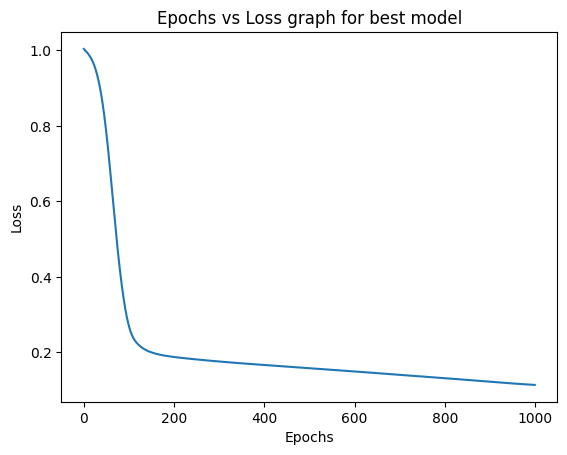

Training Losses for hidden layer 8
          0
0  1.010558
1  1.007369
2  1.004453
3  1.001809
4  0.999433
 RMSE for validation set is : 0.3531109828192441
 RMSE for test set is : 0.34810707778956895
Training Losses for hidden layer 16
          0
0  1.002549
1  0.999144
2  0.996279
3  0.993935
4  0.992057
 RMSE for validation set is : 0.3355351411590809
 RMSE for test set is : 0.33780915044276105
Training Losses for hidden layer 32
          0
0  1.002731
1  0.998193
2  0.995213
3  0.993387
4  0.992040
 RMSE for validation set is : 0.3337351890020741
 RMSE for test set is : 0.3346955607749841
Training Losses for hidden layer 64
          0
0  1.018988
1  1.003221
2  0.992572
3  0.986673
4  0.984604
 RMSE for validation set is : 0.33259931103015083
 RMSE for test set is : 0.33475673890755714
Training Losses for hidden layer 128
          0
0  1.051426
1  1.019801
2  1.004528
3  1.002587
4  1.007006
 RMSE for validation set is : 0.32418371493849363
 RMSE for test set is : 0.324478562366

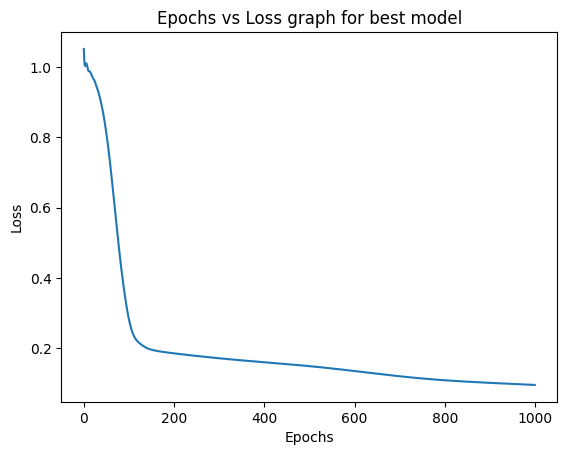

Training Losses for hidden layer 8
          0
0  1.010456
1  1.006827
2  1.003590
3  1.000713
4  0.998144
 RMSE for validation set is : 0.33925521796886443
 RMSE for test set is : 0.33712403761712556
Training Losses for hidden layer 16
          0
0  1.105929
1  1.090806
2  1.076788
3  1.063897
4  1.052145
 RMSE for validation set is : 0.3288596534794886
 RMSE for test set is : 0.32803107234270085
Training Losses for hidden layer 32
          0
0  1.001027
1  0.996021
2  0.992758
3  0.990037
4  0.987018
 RMSE for validation set is : 0.31176181868548347
 RMSE for test set is : 0.31352826461579764
Training Losses for hidden layer 64
          0
0  1.019729
1  1.004254
2  0.997117
3  0.995631
4  0.995762
 RMSE for validation set is : 0.31845352325332194
 RMSE for test set is : 0.31869054314581274
Training Losses for hidden layer 128
          0
0  1.040201
1  1.003783
2  0.993404
3  0.998351
4  1.002666
 RMSE for validation set is : 0.3213251203808774
 RMSE for test set is : 0.3224425090

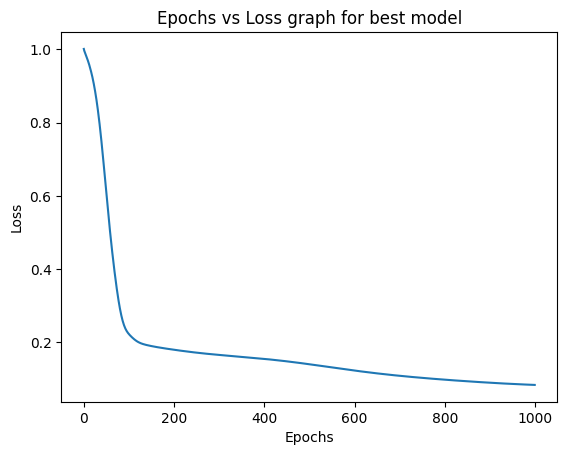

Training Losses for hidden layer 8
          0
0  1.190704
1  1.171506
2  1.153306
3  1.136150
4  1.120067
 RMSE for validation set is : 0.3358038924914056
 RMSE for test set is : 0.3338310938443564
Training Losses for hidden layer 16
          0
0  1.007470
1  1.002430
2  0.998563
3  0.995258
4  0.991989
 RMSE for validation set is : 0.31255919372695523
 RMSE for test set is : 0.3110710494621942
Training Losses for hidden layer 32
          0
0  1.026644
1  1.009149
2  0.999643
3  0.996216
4  0.995528
 RMSE for validation set is : 0.3139351078742007
 RMSE for test set is : 0.31220120211861013
Training Losses for hidden layer 64
          0
0  1.025664
1  1.000943
2  0.995030
3  0.996087
4  0.994184
 RMSE for validation set is : 0.30821855890770344
 RMSE for test set is : 0.3091692326911352
Training Losses for hidden layer 128
          0
0  1.070554
1  1.010025
2  0.994983
3  1.004992
4  1.011770
 RMSE for validation set is : 0.3066216359667361
 RMSE for test set is : 0.30669966208343

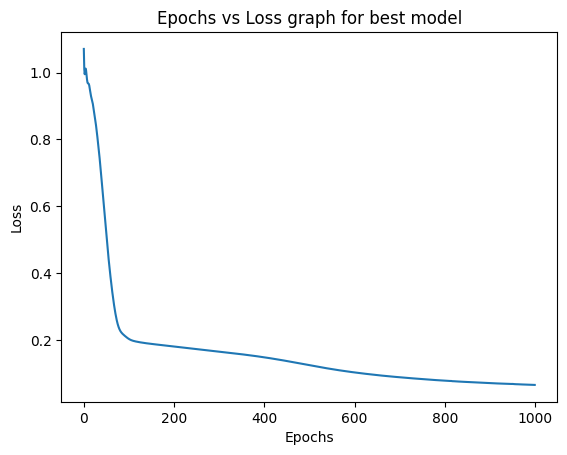

The Least Validation is 0.3066216359667361 for Hidden Layer of Size 128 & 128


In [10]:
nuerons = [8,16,32,64,128]
min_err = 10000
best_fn = 0
best_sn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for firstn in nuerons:
    for nueron in nuerons:
        model = DoubleLayer(hidden1=firstn, hidden2 = nueron)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        loss_arr = []
        for epoch in range(epochs):
            optimizer.zero_grad()
            model.train()
            output = model(X_train)
            loss=criterion(y_train.float(), output)
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
        print(f"Training Losses for hidden layer {nueron}")
        loss_df = pd.DataFrame(loss_arr)
        print(loss_df.head())
        y_val_pred=model(X_val).detach().numpy()
        rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
        min_err = min(min_err,rmse)
        if rmse == min_err:
            again_loss = loss_arr
            best_sn = nueron
            best_fn = firstn
        y_test_pred = model(X_test).detach().numpy()
        rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
        print(f" RMSE for validation set is : {rmse}")
        print(f" RMSE for test set is : {rmse_2}")
    plt.plot(range(epochs), again_loss)
    plt.title('Epochs vs Loss graph for best model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn}")
 

In [13]:
feature_names = [
    'Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus', 'EducationLevel',
    'Experience', 'LoanAmount', 'LoanDuration', 'MaritalStatus',
    'NumberOfDependents', 'HomeOwnershipStatus', 'MonthlyDebtPayments', 
    'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries',
    'DebtToIncomeRatio', 'BankruptcyHistory', 'LoanPurpose', 'PreviousLoanDefaults', 
    'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 
    'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 
    'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 
    'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'
]

with torch.no_grad():
    input_weights = model.layers[0].weight  # First Linear layer
    feature_importance = torch.sum(torch.abs(input_weights), dim=0).numpy()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                       Feature  Importance
26  UtilityBillsPaymentHistory   42.498547
9           NumberOfDependents   41.455276
27                   JobTenure   38.640553
14     NumberOfCreditInquiries   31.770296
13     NumberOfOpenCreditLines   31.700666
22      CheckingAccountBalance   31.678375
30                InterestRate   30.838242
19              PaymentHistory   29.478937
21       SavingsAccountBalance   28.838060
20       LengthOfCreditHistory   26.200172
25               MonthlyIncome   24.251030
1                 AnnualIncome   23.954853
2                  CreditScore   22.869186
28                    NetWorth   22.624680
7                 LoanDuration   22.252020
8                MaritalStatus   21.566105
32      TotalDebtToIncomeRatio   21.445337
11         MonthlyDebtPayments   20.657301
6                   LoanAmount   20.044779
29            BaseInterestRate   19.181002
23                 TotalAssets   19.006187
4               EducationLevel   18.786182
24         

In [38]:
class TripleLayer(nn.Module):
    def __init__(self, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(33, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1)
        )
    def forward(self, x):
        return self.layers(x)

Training Losses for hidden layer 8
          0
0  1.461553
1  1.451166
2  1.440915
3  1.430802
4  1.420828
 RMSE for validation set is : 0.40982890917732695 for combination 8 & 8 & 8
 RMSE for test set is : 0.39996646651134693 for combination 8 & 8 & 8
Training Losses for hidden layer 16
          0
0  1.005777
1  1.004022
2  1.002537
3  1.001323
4  1.000377
 RMSE for validation set is : 0.32991775589615624 for combination 8 & 8 & 16
 RMSE for test set is : 0.32656178040858663 for combination 8 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.001442
1  1.000409
2  1.000161
3  1.000375
4  1.000531
 RMSE for validation set is : 0.34364027743065473 for combination 8 & 8 & 32
 RMSE for test set is : 0.3407242975826862 for combination 8 & 8 & 32
Training Losses for hidden layer 64
          0
0  1.002346
1  0.999364
2  0.999116
3  0.999970
4  1.000161
 RMSE for validation set is : 0.34546662986032345 for combination 8 & 8 & 64
 RMSE for test set is : 0.34559203911628683 for com

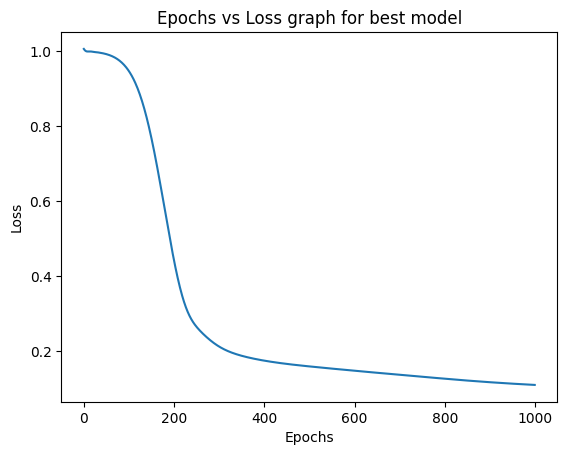

Training Losses for hidden layer 8
          0
0  1.039497
1  1.036192
2  1.033035
3  1.030028
4  1.027171
 RMSE for validation set is : 0.3481998693884441 for combination 8 & 16 & 8
 RMSE for test set is : 0.34317564665207595 for combination 8 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.033236
1  1.028193
2  1.023546
3  1.019302
4  1.015468
 RMSE for validation set is : 0.34785181609909693 for combination 8 & 16 & 16
 RMSE for test set is : 0.34474912574994704 for combination 8 & 16 & 16
Training Losses for hidden layer 32
          0
0  1.021956
1  1.015595
2  1.010317
3  1.006124
4  1.002996
 RMSE for validation set is : 0.3331879383127925 for combination 8 & 16 & 32
 RMSE for test set is : 0.32933773995423055 for combination 8 & 16 & 32
Training Losses for hidden layer 64
          0
0  1.057744
1  1.039046
2  1.024108
3  1.012906
4  1.005301
 RMSE for validation set is : 0.3472795803325482 for combination 8 & 16 & 64
 RMSE for test set is : 0.3443198357688867 for

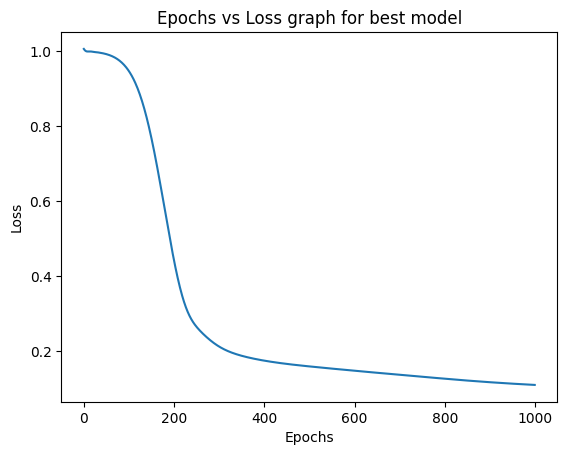

Training Losses for hidden layer 8
          0
0  0.999968
1  0.999770
2  0.999665
3  0.999602
4  0.999530
 RMSE for validation set is : 0.3394588614836196 for combination 8 & 32 & 8
 RMSE for test set is : 0.33404165747116993 for combination 8 & 32 & 8
Training Losses for hidden layer 16
          0
0  1.126577
1  1.114652
2  1.103338
3  1.092644
4  1.082577
 RMSE for validation set is : 0.3565099579181418 for combination 8 & 32 & 16
 RMSE for test set is : 0.3513548661722744 for combination 8 & 32 & 16
Training Losses for hidden layer 32
          0
0  1.005943
1  1.002394
2  1.000796
3  1.000758
4  1.001394
 RMSE for validation set is : 0.3323371712051873 for combination 8 & 32 & 32
 RMSE for test set is : 0.33036160005780807 for combination 8 & 32 & 32
Training Losses for hidden layer 64
          0
0  1.513919
1  1.442742
2  1.377188
3  1.317298
4  1.263077
 RMSE for validation set is : 0.33657087455538415 for combination 8 & 32 & 64
 RMSE for test set is : 0.33307683906104724 for

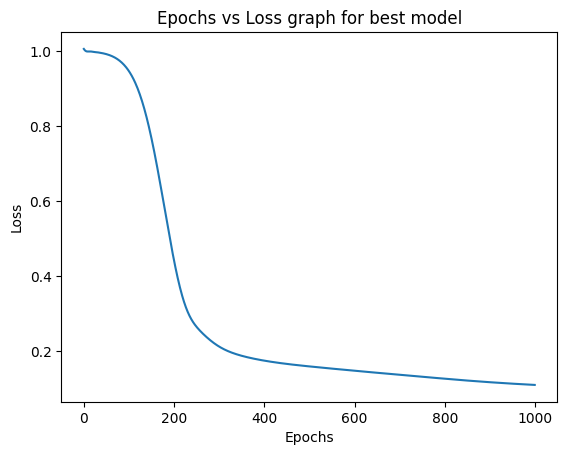

Training Losses for hidden layer 8
          0
0  1.006078
1  1.003714
2  1.002013
3  1.000952
4  1.000463
 RMSE for validation set is : 0.3461939673066742 for combination 8 & 64 & 8
 RMSE for test set is : 0.3442924943804972 for combination 8 & 64 & 8
Training Losses for hidden layer 16
          0
0  1.231832
1  1.209796
2  1.188944
3  1.169288
4  1.150837
 RMSE for validation set is : 0.3453471943096098 for combination 8 & 64 & 16
 RMSE for test set is : 0.34050667439933874 for combination 8 & 64 & 16
Training Losses for hidden layer 32
          0
0  0.999379
1  0.998590
2  0.998849
3  0.998423
4  0.997910
 RMSE for validation set is : 0.3307658147656822 for combination 8 & 64 & 32
 RMSE for test set is : 0.33179628248635623 for combination 8 & 64 & 32
Training Losses for hidden layer 64
          0
0  1.010531
1  1.000707
2  0.999264
3  1.001985
4  1.003291
 RMSE for validation set is : 0.35406116943244037 for combination 8 & 64 & 64
 RMSE for test set is : 0.353653938676239 for c

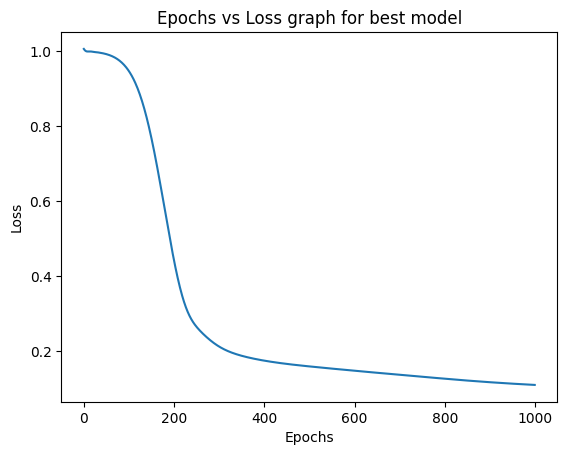

Training Losses for hidden layer 8
          0
0  1.002698
1  1.001952
2  1.001323
3  1.000811
4  1.000414
 RMSE for validation set is : 0.33709984784681585 for combination 16 & 8 & 8
 RMSE for test set is : 0.33242748403691896 for combination 16 & 8 & 8
Training Losses for hidden layer 16
          0
0  1.089375
1  1.082229
2  1.075381
3  1.068835
4  1.062596
 RMSE for validation set is : 0.33593182226306634 for combination 16 & 8 & 16
 RMSE for test set is : 0.33121600201515317 for combination 16 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.120856
1  1.106651
2  1.093354
3  1.080978
4  1.069535
 RMSE for validation set is : 0.3265836822904231 for combination 16 & 8 & 32
 RMSE for test set is : 0.32221940605030935 for combination 16 & 8 & 32
Training Losses for hidden layer 64
          0
0  1.001354
1  0.999898
2  1.000476
3  1.000529
4  1.000009
 RMSE for validation set is : 0.33183461144661175 for combination 16 & 8 & 64
 RMSE for test set is : 0.3299540675954086 f

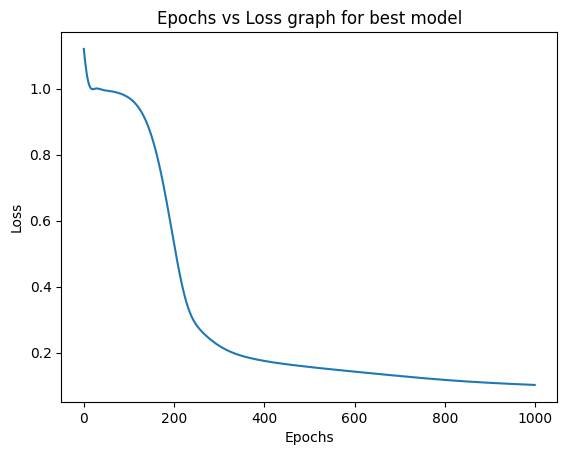

Training Losses for hidden layer 8
          0
0  1.058931
1  1.054601
2  1.050436
3  1.046441
4  1.042616
 RMSE for validation set is : 0.34469935063925394 for combination 16 & 16 & 8
 RMSE for test set is : 0.3417304601176029 for combination 16 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.115129
1  1.106673
2  1.098559
3  1.090788
4  1.083363
 RMSE for validation set is : 0.33812086166274974 for combination 16 & 16 & 16
 RMSE for test set is : 0.33579064641402195 for combination 16 & 16 & 16
Training Losses for hidden layer 32
          0
0  1.514519
1  1.481747
2  1.450178
3  1.419821
4  1.390678
 RMSE for validation set is : 0.3349475579884421 for combination 16 & 16 & 32
 RMSE for test set is : 0.32880677057570284 for combination 16 & 16 & 32
Training Losses for hidden layer 64
          0
0  1.044194
1  1.028096
2  1.015869
3  1.007463
4  1.002643
 RMSE for validation set is : 0.3298576792599804 for combination 16 & 16 & 64
 RMSE for test set is : 0.3282313742099

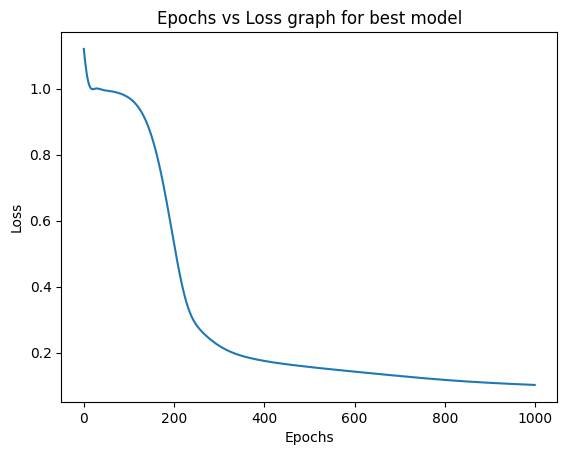

Training Losses for hidden layer 8
          0
0  1.368696
1  1.354309
2  1.340259
3  1.326549
4  1.313184
 RMSE for validation set is : 0.38463528356978127 for combination 16 & 32 & 8
 RMSE for test set is : 0.3785079160048977 for combination 16 & 32 & 8
Training Losses for hidden layer 16
          0
0  1.000588
1  0.999848
2  0.999666
3  0.999680
4  0.999567
 RMSE for validation set is : 0.32762041349813753 for combination 16 & 32 & 16
 RMSE for test set is : 0.3290057170090025 for combination 16 & 32 & 16
Training Losses for hidden layer 32
          0
0  1.074685
1  1.058615
2  1.044543
3  1.032481
4  1.022421
 RMSE for validation set is : 0.3255611801574751 for combination 16 & 32 & 32
 RMSE for test set is : 0.32504096965049206 for combination 16 & 32 & 32
Training Losses for hidden layer 64
          0
0  1.025371
1  1.011705
2  1.003267
3  0.999684
4  0.999903
 RMSE for validation set is : 0.3186170787043627 for combination 16 & 32 & 64
 RMSE for test set is : 0.31776643310405

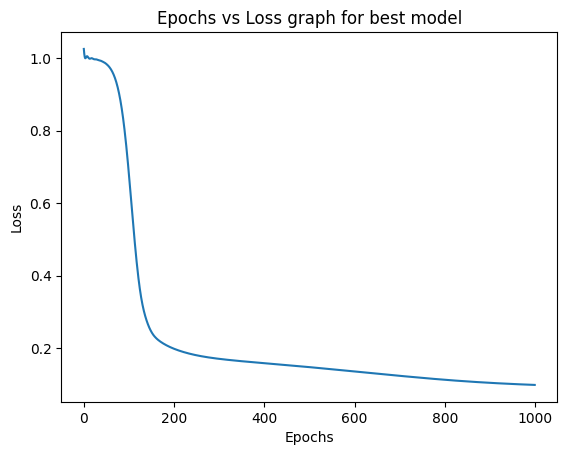

Training Losses for hidden layer 8
          0
0  1.220130
1  1.201995
2  1.184659
3  1.168138
4  1.152446
 RMSE for validation set is : 0.34478350809284974 for combination 16 & 64 & 8
 RMSE for test set is : 0.3396290067760001 for combination 16 & 64 & 8
Training Losses for hidden layer 16
          0
0  0.999697
1  0.999494
2  0.999078
3  0.998804
4  0.998511
 RMSE for validation set is : 0.3224385462287541 for combination 16 & 64 & 16
 RMSE for test set is : 0.3224456862060978 for combination 16 & 64 & 16
Training Losses for hidden layer 32
          0
0  1.120420
1  1.091619
2  1.066928
3  1.046353
4  1.029834
 RMSE for validation set is : 0.3302929534650439 for combination 16 & 64 & 32
 RMSE for test set is : 0.32920389819942714 for combination 16 & 64 & 32
Training Losses for hidden layer 64
          0
0  1.015686
1  1.003548
2  0.999709
3  1.001623
4  1.004344
 RMSE for validation set is : 0.33439491649387365 for combination 16 & 64 & 64
 RMSE for test set is : 0.33476912453245

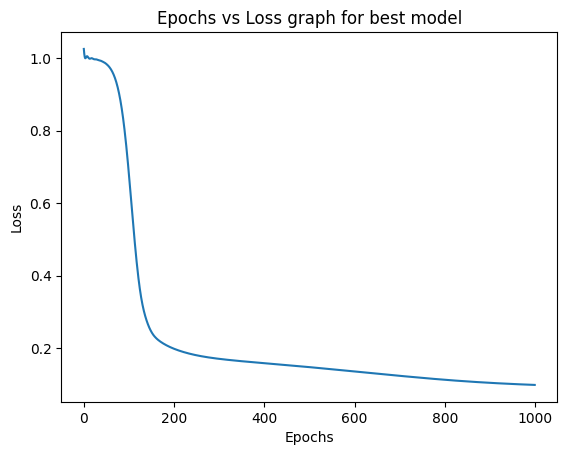

Training Losses for hidden layer 8
          0
0  1.339075
1  1.330436
2  1.321914
3  1.313510
4  1.305227
 RMSE for validation set is : 0.37607333436523677 for combination 32 & 8 & 8
 RMSE for test set is : 0.36804296389019736 for combination 32 & 8 & 8
Training Losses for hidden layer 16
          0
0  1.189427
1  1.178832
2  1.168553
3  1.158595
4  1.148961
 RMSE for validation set is : 0.3385695213693997 for combination 32 & 8 & 16
 RMSE for test set is : 0.3356538395593997 for combination 32 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.345513
1  1.320974
2  1.297368
3  1.274707
4  1.253003
 RMSE for validation set is : 0.32879685691685157 for combination 32 & 8 & 32
 RMSE for test set is : 0.3267484810654492 for combination 32 & 8 & 32
Training Losses for hidden layer 64
          0
0  1.005847
1  1.001765
2  1.000743
3  1.001545
4  1.002178
 RMSE for validation set is : 0.3212839259516798 for combination 32 & 8 & 64
 RMSE for test set is : 0.31977433842153724 for

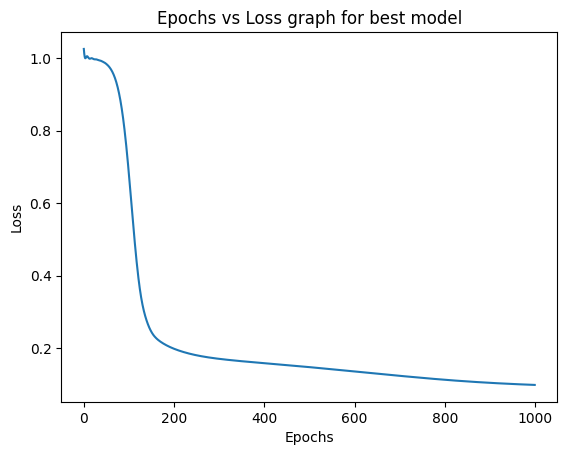

Training Losses for hidden layer 8
          0
0  1.018696
1  1.016327
2  1.014125
3  1.012091
4  1.010223
 RMSE for validation set is : 0.33028515975966766 for combination 32 & 16 & 8
 RMSE for test set is : 0.3278141706622293 for combination 32 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.012379
1  1.009022
2  1.006149
3  1.003758
4  1.001838
 RMSE for validation set is : 0.3222179377559206 for combination 32 & 16 & 16
 RMSE for test set is : 0.3214008287631876 for combination 32 & 16 & 16
Training Losses for hidden layer 32
          0
0  1.045338
1  1.035695
2  1.027238
3  1.019972
4  1.013892
 RMSE for validation set is : 0.3199879816711596 for combination 32 & 16 & 32
 RMSE for test set is : 0.32060916467419254 for combination 32 & 16 & 32
Training Losses for hidden layer 64
          0
0  1.089028
1  1.065252
2  1.045307
3  1.029209
4  1.016902
 RMSE for validation set is : 0.32434060208360294 for combination 32 & 16 & 64
 RMSE for test set is : 0.32314371643240

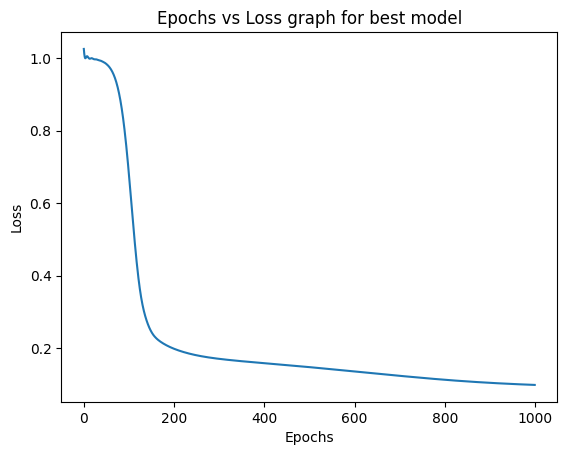

Training Losses for hidden layer 8
          0
0  1.049948
1  1.044735
2  1.039813
3  1.035185
4  1.030852
 RMSE for validation set is : 0.32832174987296786 for combination 32 & 32 & 8
 RMSE for test set is : 0.32624023543466985 for combination 32 & 32 & 8
Training Losses for hidden layer 16
          0
0  1.108268
1  1.096020
2  1.084528
3  1.073801
4  1.063840
 RMSE for validation set is : 0.33049128705816366 for combination 32 & 32 & 16
 RMSE for test set is : 0.32600918441469534 for combination 32 & 32 & 16
Training Losses for hidden layer 32
          0
0  1.060441
1  1.045672
2  1.033044
3  1.022551
4  1.014156
 RMSE for validation set is : 0.3228556462541367 for combination 32 & 32 & 32
 RMSE for test set is : 0.32277487774698077 for combination 32 & 32 & 32
Training Losses for hidden layer 64
          0
0  1.075123
1  1.049527
2  1.029250
3  1.014271
4  1.004390
 RMSE for validation set is : 0.32595197608891197 for combination 32 & 32 & 64
 RMSE for test set is : 0.32618015530

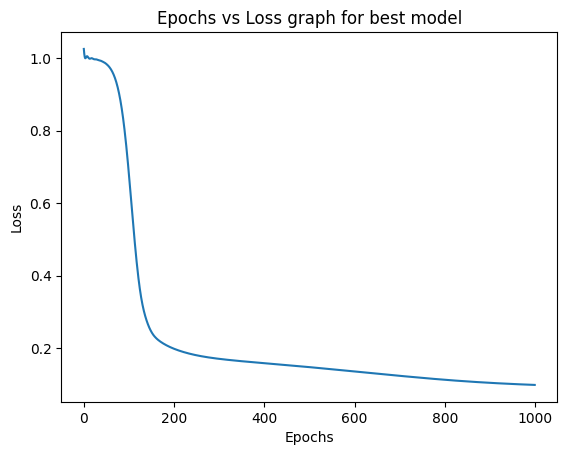

Training Losses for hidden layer 8
          0
0  1.631852
1  1.603384
2  1.575652
3  1.548677
4  1.522479
 RMSE for validation set is : 0.37306247299099654 for combination 32 & 64 & 8
 RMSE for test set is : 0.367594067737585 for combination 32 & 64 & 8
Training Losses for hidden layer 16
          0
0  1.024770
1  1.017582
2  1.011692
3  1.007090
4  1.003739
 RMSE for validation set is : 0.32091079056611077 for combination 32 & 64 & 16
 RMSE for test set is : 0.32258918009703436 for combination 32 & 64 & 16
Training Losses for hidden layer 32
          0
0  1.059468
1  1.041987
2  1.027574
3  1.016251
4  1.007969
 RMSE for validation set is : 0.3216855926990757 for combination 32 & 64 & 32
 RMSE for test set is : 0.320522948656777 for combination 32 & 64 & 32
Training Losses for hidden layer 64
          0
0  1.009497
1  1.000825
2  0.999593
3  1.001853
4  1.002709
 RMSE for validation set is : 0.3190021812258262 for combination 32 & 64 & 64
 RMSE for test set is : 0.3186652814253589

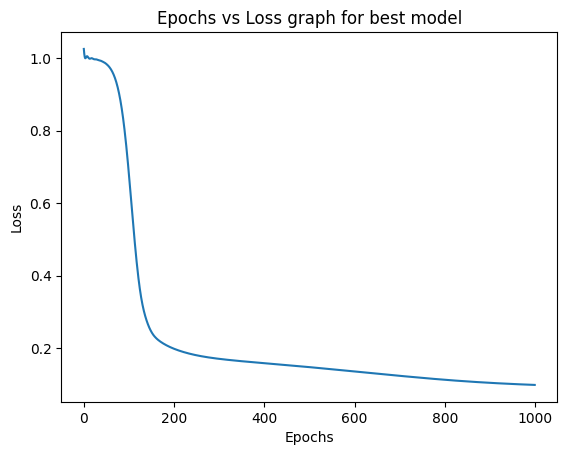

Training Losses for hidden layer 8
          0
0  1.016060
1  1.013812
2  1.011723
3  1.009792
4  1.008020
 RMSE for validation set is : 0.32204313979023963 for combination 64 & 8 & 8
 RMSE for test set is : 0.31928729932224886 for combination 64 & 8 & 8
Training Losses for hidden layer 16
          0
0  1.004711
1  1.002739
2  1.001187
3  1.000035
4  0.999234
 RMSE for validation set is : 0.3137425515251999 for combination 64 & 8 & 16
 RMSE for test set is : 0.3147013259282467 for combination 64 & 8 & 16
Training Losses for hidden layer 32
          0
0  1.178249
1  1.159011
2  1.140907
3  1.123952
4  1.108156
 RMSE for validation set is : 0.3176192004865203 for combination 64 & 8 & 32
 RMSE for test set is : 0.3186377846714655 for combination 64 & 8 & 32
Training Losses for hidden layer 64
          0
0  1.014290
1  1.006110
2  1.001341
3  0.999635
4  1.000094
 RMSE for validation set is : 0.31266992240724234 for combination 64 & 8 & 64
 RMSE for test set is : 0.31305872322358674 for

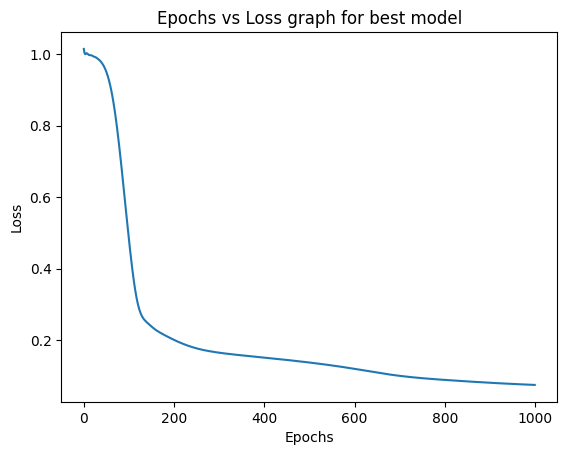

Training Losses for hidden layer 8
          0
0  1.231950
1  1.221557
2  1.211433
3  1.201583
4  1.192010
 RMSE for validation set is : 0.33411816376779324 for combination 64 & 16 & 8
 RMSE for test set is : 0.3317987188760008 for combination 64 & 16 & 8
Training Losses for hidden layer 16
          0
0  1.032427
1  1.026947
2  1.021970
3  1.017501
4  1.013537
 RMSE for validation set is : 0.31399609542198803 for combination 64 & 16 & 16
 RMSE for test set is : 0.3170819543832745 for combination 64 & 16 & 16
Training Losses for hidden layer 32
          0
0  1.195179
1  1.172902
2  1.152071
3  1.132688
4  1.114747
 RMSE for validation set is : 0.31272162684717153 for combination 64 & 16 & 32
 RMSE for test set is : 0.31284644473383 for combination 64 & 16 & 32
Training Losses for hidden layer 64
          0
0  1.021078
1  1.010391
2  1.003582
3  1.000405
4  1.000143
 RMSE for validation set is : 0.3111233548764192 for combination 64 & 16 & 64
 RMSE for test set is : 0.3096533703017105

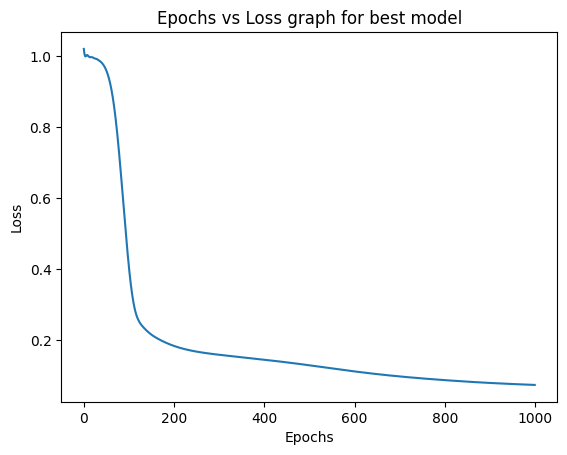

Training Losses for hidden layer 8
          0
0  1.010628
1  1.007546
2  1.004899
3  1.002682
4  1.000882
 RMSE for validation set is : 0.319552998164083 for combination 64 & 32 & 8
 RMSE for test set is : 0.31833718813481227 for combination 64 & 32 & 8
Training Losses for hidden layer 16
          0
0  1.077022
1  1.065104
2  1.054204
3  1.044329
4  1.035481
 RMSE for validation set is : 0.3103830877272755 for combination 64 & 32 & 16
 RMSE for test set is : 0.31096853264306634 for combination 64 & 32 & 16
Training Losses for hidden layer 32
          0
0  1.052309
1  1.038694
2  1.027170
3  1.017756
4  1.010432
 RMSE for validation set is : 0.31488099221073834 for combination 64 & 32 & 32
 RMSE for test set is : 0.3135206957971888 for combination 64 & 32 & 32
Training Losses for hidden layer 64
          0
0  1.174347
1  1.132713
2  1.096993
3  1.067155
4  1.043103
 RMSE for validation set is : 0.31279730959049895 for combination 64 & 32 & 64
 RMSE for test set is : 0.31168871713388

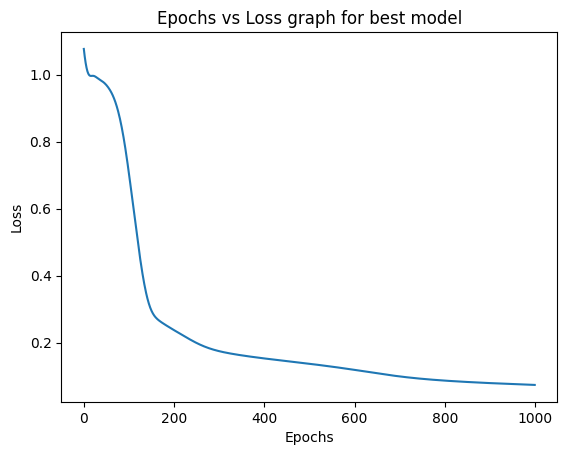

Training Losses for hidden layer 8
          0
0  1.749278
1  1.704236
2  1.660738
3  1.618797
4  1.578431
 RMSE for validation set is : 0.3588587328320885 for combination 64 & 64 & 8
 RMSE for test set is : 0.35444979243386104 for combination 64 & 64 & 8
Training Losses for hidden layer 16
          0
0  1.045757
1  1.033471
2  1.023152
3  1.014800
4  1.008378
 RMSE for validation set is : 0.31439619555983406 for combination 64 & 64 & 16
 RMSE for test set is : 0.3169410800690265 for combination 64 & 64 & 16
Training Losses for hidden layer 32
          0
0  1.238786
1  1.200439
2  1.165802
3  1.134829
4  1.107442
 RMSE for validation set is : 0.31719350010500746 for combination 64 & 64 & 32
 RMSE for test set is : 0.31587512567439896 for combination 64 & 64 & 32
Training Losses for hidden layer 64
          0
0  1.014123
1  1.002357
2  0.999724
3  1.002112
4  1.003636
 RMSE for validation set is : 0.3168924740105905 for combination 64 & 64 & 64
 RMSE for test set is : 0.3164600632670

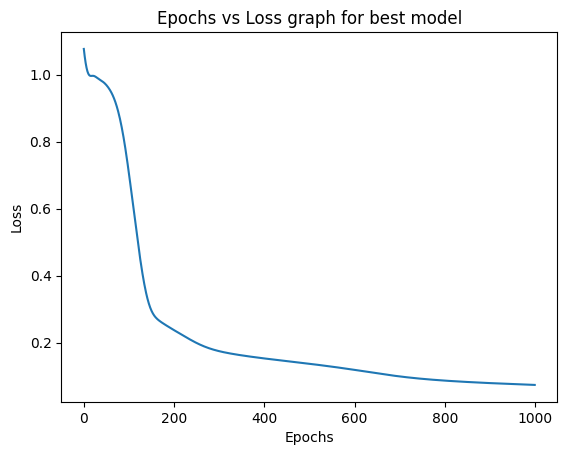

The Least Validation is 0.3103830877272755 for Hidden Layer of Size 64 & 32 & 16


In [39]:
nuerons = [8,16,32,64]
min_err = 10000
best_fn = 0
best_sn = 0
best_tn = 0
again_loss = []
epochs = 1000
opt_degree = 0
for nueronF in nuerons:
    for firstn in nuerons:
        for nueron in nuerons:
            model = TripleLayer(hidden1=nueronF,hidden2=firstn, hidden3 = nueron)
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            loss_arr = []
            for epoch in range(epochs):
                optimizer.zero_grad()
                model.train()
                output = model(X_train)
                loss=criterion(y_train.float(), output)
                loss_arr.append(loss.detach().numpy())
                loss.backward()
                optimizer.step()
            print(f"Training Losses for hidden layer {nueron}")
            loss_df = pd.DataFrame(loss_arr)
            print(loss_df.head())
            y_val_pred=model(X_val).detach().numpy()
            rmse =math.sqrt(mean_squared_error(y_val,y_val_pred))
            min_err = min(min_err,rmse)
            if rmse == min_err:
                again_loss = loss_arr
                best_sn = firstn
                best_fn = nueronF
                best_tn = nueron
            y_test_pred = model(X_test).detach().numpy()
            rmse_2 = math.sqrt(mean_squared_error(y_test,y_test_pred))
            print(f" RMSE for validation set is : {rmse} for combination {nueronF} & {firstn} & {nueron}")
            print(f" RMSE for test set is : {rmse_2} for combination {nueronF} & {firstn} & {nueron}")
        plt.plot(range(epochs), again_loss)
        plt.title('Epochs vs Loss graph for best model')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()  
print(f"The Least Validation is {min_err} for Hidden Layer of Size {best_fn} & {best_sn} & {best_tn}")
 

In [40]:
model = SingleLayer(hidden1=256)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


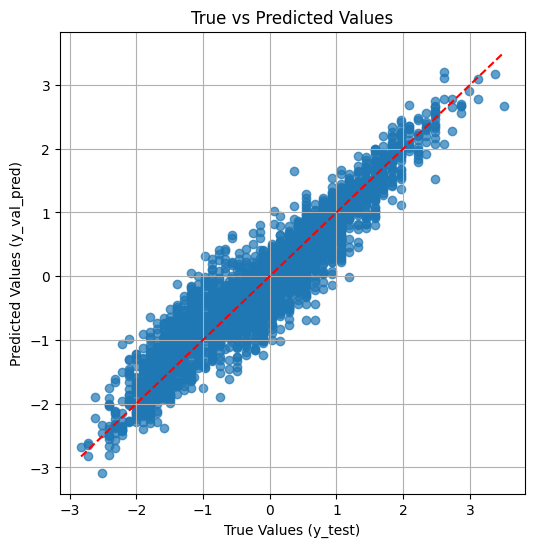

In [41]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [42]:
model = DoubleLayer(hidden1=128,hidden2 = 128)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


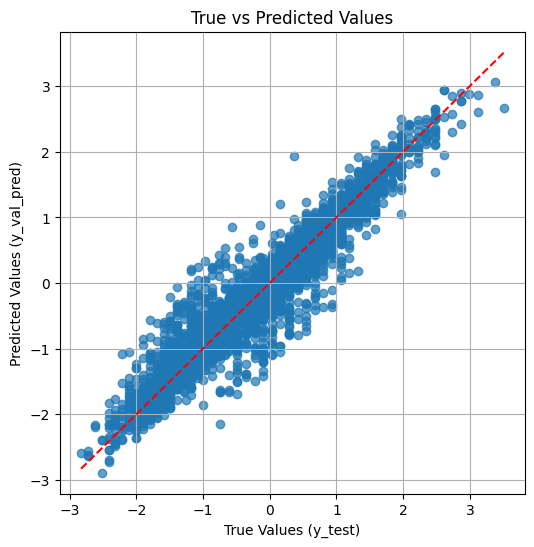

In [43]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()

In [44]:
model = TripleLayer(hidden1=64,hidden2 = 32, hidden3=16)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_arr = []

for epoch in range(epochs):
    optimizer.zero_grad()
    model.train()
    
    output = model(X_train)
    loss = criterion(y_train.float(), output)
    loss_arr.append(loss.detach().numpy())
    
    loss.backward()
    optimizer.step()

model.eval()
with torch.no_grad():
    y_val_pred = model(X_test).detach().numpy()


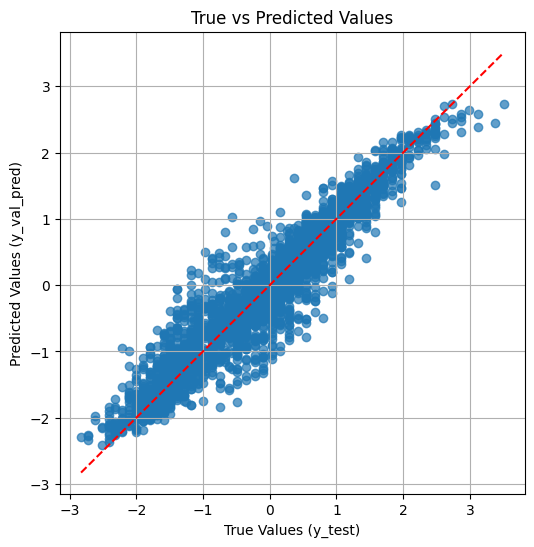

In [45]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_val_pred, alpha=0.7)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_val_pred)")
plt.title("True vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.grid(True)
plt.show()